In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/election_results_2024.csv")
df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


### Data type Margin is 'object' ,Converted it to 'float'

In [4]:
df['Margin'] = pd.to_numeric(df['Margin'], errors = 'coerce')

In [5]:
print(df.dtypes)

Constituency           object
Const. No.              int64
Leading Candidate      object
Leading Party          object
Trailing Candidate     object
Trailing Party         object
Margin                float64
Status                 object
dtype: object


## Which Party won most Constituencies?

In [6]:
party_wins = pd.DataFrame(df['Leading Party'].value_counts()).reset_index()
party_wins.columns = ['Party','No_of_Seats_wins']
party_wins.head(10)

,Party,No_of_Seats_wins
0,Bharatiya Janata Party,240
1,Indian National Congress,99
2,Samajwadi Party,37
3,All India Trinamool Congress,29
4,Dravida Munnetra Kazhagam,22
5,Telugu Desam,16
6,Janata Dal (United),12
7,Shiv Sena (Uddhav Balasaheb Thackrey),9
8,Nationalist Congress Party – Sharadchandra Pawar,8
9,Shiv Sena,7


In [7]:
top_10_party = list(party_wins['Party'][0:10])
top_10_party               

['Bharatiya Janata Party',
 'Indian National Congress',
 'Samajwadi Party',
 'All India Trinamool Congress',
 'Dravida Munnetra Kazhagam',
 'Telugu Desam',
 'Janata Dal (United)',
 'Shiv Sena (Uddhav Balasaheb Thackrey)',
 'Nationalist Congress Party – Sharadchandra Pawar',
 'Shiv Sena']

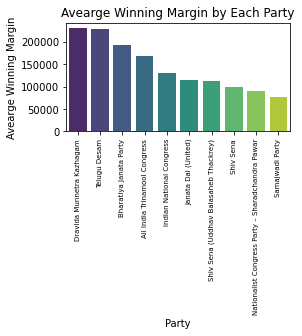

In [8]:
df_leads = df[df['Leading Party'].isin(top_10_party)]
avearge_margin_by_party = df_leads.groupby('Leading Party')['Margin'].mean().sort_values(ascending = False)
plt.figure(figsize=(4,2))
sns.barplot(x=avearge_margin_by_party.index,y = avearge_margin_by_party.values,palette = 'viridis')
plt.title('Avearge Winning Margin by Each Party')
plt.xlabel('Party')
plt.ylabel('Avearge Winning Margin')
plt.xticks(rotation = 90 , size = 7)
plt.show()

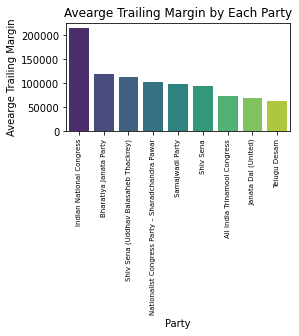

In [9]:
df_leads = df[df['Trailing Party'].isin(top_10_party)]
avearge_margin_by_party = df_leads.groupby('Trailing Party')['Margin'].mean().sort_values(ascending = False)
plt.figure(figsize=(4,2))
sns.barplot(x=avearge_margin_by_party.index,y = avearge_margin_by_party.values,palette = 'viridis')
plt.title('Avearge Trailing Margin by Each Party')
plt.xlabel('Party')
plt.ylabel('Avearge Trailing Margin')
plt.xticks(rotation = 90 , size = 7)
plt.show()

### Votes distribution by party

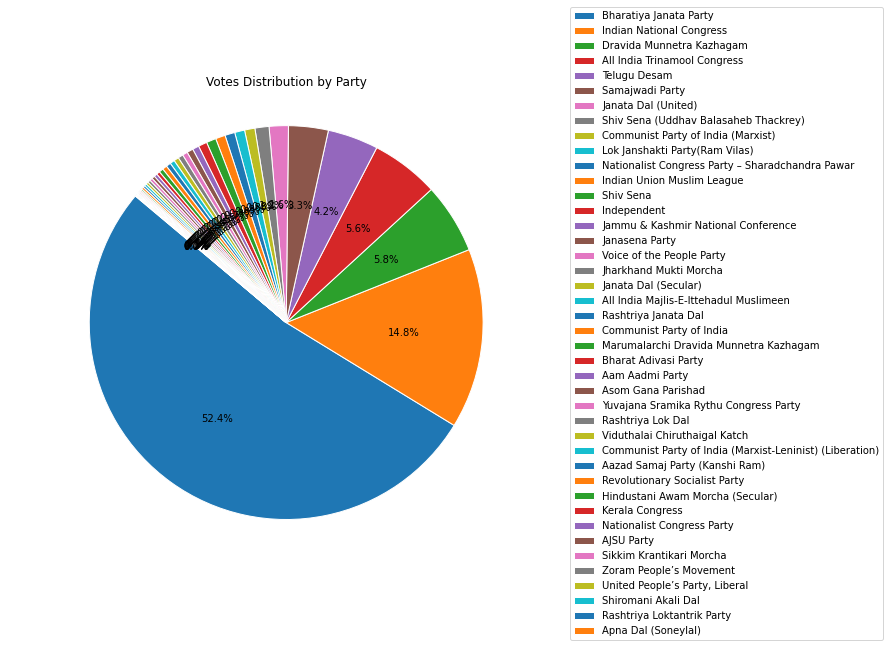

In [26]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

In [10]:
data = pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/constituencywise_details.csv")
data

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62
2,Andhra Pradesh,1,Araku (ST),3,APPALANARASA PACHIPENTA,Communist Party of India (Marxist),119016,4113,123129,10.57
3,Andhra Pradesh,1,Araku (ST),4,AVASHYA LAHARI . VARAM,Bahujan Samaj Party,24858,892,25750,2.21
4,Andhra Pradesh,1,Araku (ST),5,SAMAREDDY BALAKRISHNA,Independent,9493,42,9535,0.82
...,...,...,...,...,...,...,...,...,...,...
8897,Jammu and Kashmir,5,JAMMU,23,NOTA,None of the Above,4631,14,4645,0.36
8898,Ladakh,1,Ladakh,1,MOHMAD HANEEFA,Independent,64443,816,65259,48.15
8899,Ladakh,1,Ladakh,2,TSERING NAMGYAL,Indian National Congress,35770,1627,37397,27.59
8900,Ladakh,1,Ladakh,3,TASHI GYALSON,Bharatiya Janata Party,31505,451,31956,23.58


In [12]:
data_new = data.drop_duplicates(subset = 'PC Name')
data_new.head(10)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
14,Andhra Pradesh,2,Srikakulam,1,KINJARAPU RAMMOHAN NAIDU,Telugu Desam,734501,19827,754328,61.05
28,Andhra Pradesh,3,Vizianagaram,1,APPALANAIDU KALISETTI,Telugu Desam,729284,13829,743113,57.2
44,Andhra Pradesh,4,Visakhapatnam,1,SRIBHARAT MATHUKUMILI,Telugu Desam,893884,13583,907467,65.42
78,Andhra Pradesh,5,Anakapalle,1,C.M.RAMESH,Bharatiya Janata Party,750027,12042,762069,57.5
94,Andhra Pradesh,6,Kakinada,1,TANGELLA UDAY SRINIVAS (TEA TIME UDAY),Janasena Party,718971,10728,729699,54.87
110,Andhra Pradesh,7,Amalapuram (SC),1,G M HARISH (BALAYOGI),Telugu Desam,786149,10832,796981,61.25
126,Andhra Pradesh,8,Rajahmundry,1,DAGGUBATI PURANDHESHWARI,Bharatiya Janata Party,718641,7874,726515,54.82
139,Andhra Pradesh,9,Narsapuram,1,BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),Bharatiya Janata Party,699382,7961,707343,57.46
161,Andhra Pradesh,10,Eluru,1,PUTTA MAHESH KUMAR,Telugu Desam,737644,8707,746351,54


In [15]:
data_new[data_new['Candidate']=='RAHUL GANDHI']


,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
2308,Kerala,4,Wayanad,1,RAHUL GANDHI,Indian National Congress,642299,5146,647445,59.69
6371,Uttar Pradesh,36,Rae Bareli,1,RAHUL GANDHI,Indian National Congress,686044,1605,687649,66.17


In [22]:
result = pd.merge(df,data_new,left_on='Leading Candidate',right_on='Candidate',how = 'left')
display(result)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared,Rajasthan,13.0,AJMER,1.0,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,741151,6311,747462,62.23
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared,Rajasthan,8.0,ALWAR,1.0,BHUPENDER YADAV,Bharatiya Janata Party,624110,7882,631992,50.42
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared,Haryana,1.0,AMBALA,1.0,VARUN CHAUDHRY,Indian National Congress,662592,1065,663657,49.28
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared,Jammu and Kashmir,3.0,ANANTNAG-RAJOURI,1.0,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,517489,4347,521836,50.85
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared,Tamil Nadu,7.0,ARAKKONAM,1.0,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,560578,2638,563216,48.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422.0,Result Declared,Kerala,4.0,Wayanad,1.0,RAHUL GANDHI,Indian National Congress,642299,5146,647445,59.69
541,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422.0,Result Declared,Uttar Pradesh,36.0,Rae Bareli,1.0,RAHUL GANDHI,Indian National Congress,686044,1605,687649,66.17
542,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013.0,Result Declared,NCT OF Delhi,6.0,West Delhi,1.0,KAMALJEET SEHRAWAT,Bharatiya Janata Party,838332,4326,842658,55.27
543,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473.0,Result Declared,Maharashtra,14.0,Yavatmal- Washim,1.0,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),591899,2908,594807,48.53


In [23]:
df_new = result.drop_duplicates(subset ='Constituency')

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 544
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        541 non-null    object 
 1   Const. No.          541 non-null    int64  
 2   Leading Candidate   541 non-null    object 
 3   Leading Party       541 non-null    object 
 4   Trailing Candidate  540 non-null    object 
 5   Trailing Party      540 non-null    object 
 6   Margin              540 non-null    float64
 7   Status              541 non-null    object 
 8   State               528 non-null    object 
 9   PC No               528 non-null    float64
 10  PC Name             528 non-null    object 
 11  Sl no               528 non-null    float64
 12  Candidate           528 non-null    object 
 13  Party               528 non-null    object 
 14  EVM Votes           528 non-null    object 
 15  Postal Votes        528 non-null    object 
 16  Total Vo

### Winning margin of BJP across the states

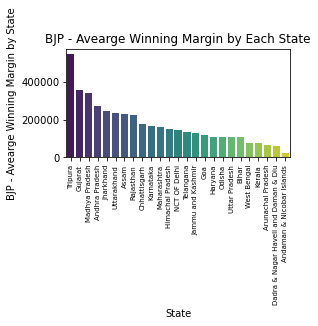

In [25]:
df_leads = df_new[df_new['Leading Party']=='Bharatiya Janata Party']
avearge_margin_by_state_party = df_leads.groupby(['State'])['Margin'].mean().sort_values(ascending = False)
plt.figure(figsize=(4,2))
sns.barplot(x=avearge_margin_by_state_party.index,y = avearge_margin_by_state_party.values,palette = 'viridis')
plt.title('BJP - Avearge Winning Margin by Each State')
plt.xlabel('State')
plt.ylabel('BJP - Avearge Winning Margin by State')
plt.xticks(rotation = 90 , size = 7)
plt.show()

## Highest and lowest Victory Candidate

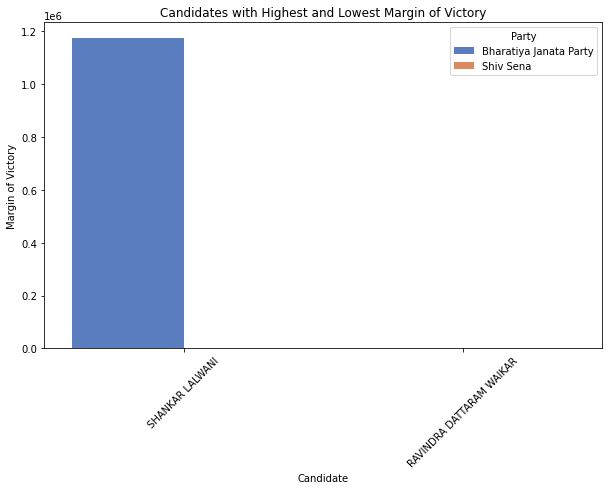

In [28]:
highest_margin_entry = df.loc[df['Margin'].idxmax()]
lowest_margin_entry = df.loc[df['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

### Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah

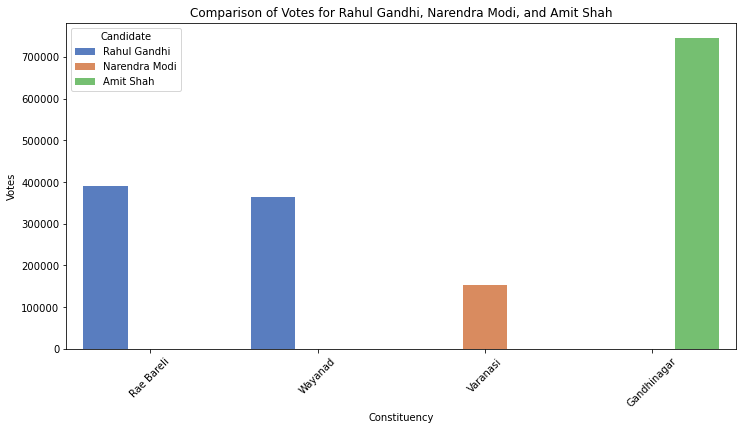

In [29]:
rahul_entries = df[df['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = df[df['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = df[df['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()